In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#Es necesario habilitar el iterative imputer explicitamente ya que aun es experimental
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv("/workspaces/repos1/Semana_10/Churn_Modelling.csv")

df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,NaN,NaN,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,NaN,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,NaN,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50.0,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Male,29.0,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1,1,71725.73,0


<Axes: >

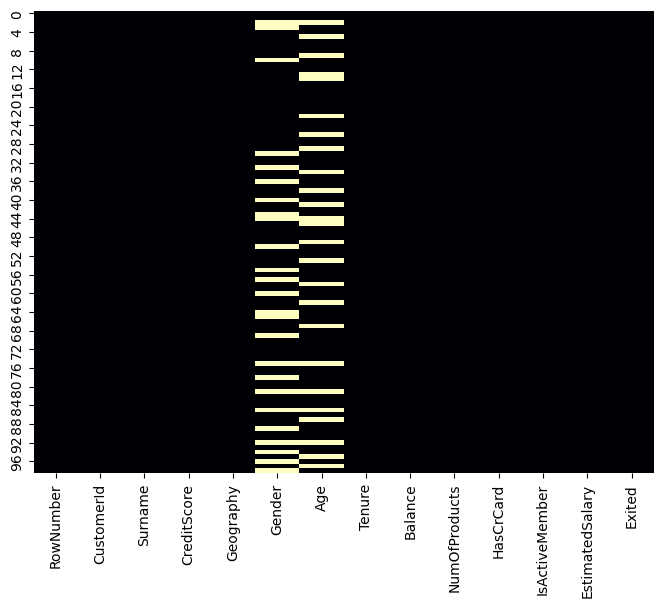

In [4]:
plt.figure(figsize = (8,6))
sb.heatmap(df.isnull(), cbar=False , cmap = 'magma')

In [2]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [3]:
impute_col = 'Gender'
impute_col_encoded = 'Gender_no'

In [4]:
le.fit(df.loc[:, impute_col])

LabelEncoder()

In [5]:
#Mapeo de etiqueta
dict(zip(le.classes_, le.transform(le.classes_)))

{'Female': 0, 'Male': 1, nan: 2}

In [6]:
df[impute_col_encoded] = le.transform(df[impute_col])
df[["Surname", "Gender", "Gender_no"]].head(7)

,Surname,Gender,Gender_no
0,Hargrave,Female,0
1,Hill,Female,0
2,Onio,NaN,2
3,Boni,NaN,2
4,Mitchell,Female,0
5,Chu,Male,1
6,Bartlett,Male,1


In [7]:
df[impute_col_encoded] = df[impute_col_encoded].map(lambda x: np.nan if x == 2 else x)

In [8]:
df[impute_col_encoded].value_counts()

Gender_no
1.0    40
0.0    34
Name: count, dtype: int64

In [9]:
#Se define el imputer
imputer = IterativeImputer(random_state=100)

In [10]:
df_train = df.loc[:, ["Exited", impute_col_encoded, "Balance"]]
df_train.head()

,Exited,Gender_no,Balance
0,1,0.0,0.00
1,0,0.0,83807.86
2,1,NaN,159660.80
3,0,NaN,0.00
4,0,0.0,125510.82


In [11]:
#Encajar en db
imputer.fit(df_train)


IterativeImputer(random_state=100)

In [12]:
df_imputed = imputer.transform(df_train)
df_imputed[:10]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 8.38078600e+04],
       [1.00000000e+00, 5.78599948e-01, 1.59660800e+05],
       [0.00000000e+00, 5.11722247e-01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.25510820e+05],
       [1.00000000e+00, 1.00000000e+00, 1.13755780e+05],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.15046740e+05],
       [0.00000000e+00, 1.00000000e+00, 1.42051070e+05],
       [0.00000000e+00, 1.00000000e+00, 1.34603880e+05]])

In [13]:
df_imputed[:, 1].round()

array([0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
#Reemplazar con valores imputados
df.loc[:, [impute_col_encoded]] = df_imputed[:, 1].round()
df.head(7)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_no
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1,0.0
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,0.0
2,3,15619304,Onio,502,France,NaN,NaN,8,159660.80,3,1,0,113931.57,1,1.0
3,4,15701354,Boni,699,France,NaN,39.0,1,0.00,2,0,0,93826.63,0,1.0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0,0.0
5,6,15574012,Chu,645,Spain,Male,NaN,8,113755.78,2,1,0,149756.71,1,1.0
6,7,15592531,Bartlett,822,France,Male,50.0,7,0.00,2,1,1,10062.80,0,1.0


In [15]:
Gender_imputed = list(le.inverse_transform(df[impute_col_encoded].round().astype('int')))
Gender_imputed[:10]

['Female',
 'Female',
 'Male',
 'Male',
 'Female',
 'Male',
 'Male',
 'Male',
 'Male',
 'Male']

In [16]:
df['Gender_imputed'] = Gender_imputed
df.drop(['Gender'], axis=1, inplace=True)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_no,Gender_imputed
0,1,15634602,Hargrave,619,France,42.0,2,0.00,1,1,1,101348.88,1,0.0,Female
1,2,15647311,Hill,608,Spain,41.0,1,83807.86,1,0,1,112542.58,0,0.0,Female
2,3,15619304,Onio,502,France,NaN,8,159660.80,3,1,0,113931.57,1,1.0,Male
3,4,15701354,Boni,699,France,39.0,1,0.00,2,0,0,93826.63,0,1.0,Male
4,5,15737888,Mitchell,850,Spain,43.0,2,125510.82,1,1,1,79084.10,0,0.0,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,15676966,Capon,730,Spain,42.0,4,0.00,2,0,1,85982.47,0,1.0,Male
95,96,15699461,Fiorentini,515,Spain,NaN,10,176273.95,1,0,1,121277.78,0,1.0,Male
96,97,15738721,Graham,773,Spain,41.0,9,102827.44,1,0,1,64595.25,0,1.0,Male
97,98,15693683,Yuille,814,Germany,NaN,8,97086.40,2,1,1,197276.13,0,1.0,Male


In [17]:
df.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
CreditScore         0
Geography           0
Age                25
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
Exited              0
Gender_no           0
Gender_imputed      0
dtype: int64

In [21]:
#Definiendo el imputer
imputer = IterativeImputer(random_state=100)

In [22]:
rf = RandomForestRegressor(random_state=100)
imputer = IterativeImputer(random_state=100, estimator=rf)

In [23]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_no,Gender_imputed
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1,0.0,Female
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0,0.0,Female
2,3,15619304,Onio,502,France,NaN,NaN,8,159660.80,3,1,0,113931.57,1,1.0,Male
3,4,15701354,Boni,699,France,NaN,39.0,1,0.00,2,0,0,93826.63,0,1.0,Male
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0,0.0,Female


In [24]:
#Usar caracteristicas numéricas
df_train = df.loc[:, ["Balance", "Age", "Exited"]]
df_train.head(15)


,Balance,Age,Exited
0,0.00,42.0,1
1,83807.86,41.0,0
2,159660.80,NaN,1
3,0.00,39.0,0
4,125510.82,43.0,0
5,113755.78,NaN,1
6,0.00,50.0,0
7,115046.74,29.0,1
8,142051.07,44.0,0
9,134603.88,NaN,0


In [25]:
imputer.fit(df_train)

IterativeImputer(estimator=RandomForestRegressor(random_state=100),
                 random_state=100)

In [26]:
df_imputed = imputer.transform(df_train)
df_imputed[:10] 

array([[0.0000000e+00, 4.2000000e+01, 1.0000000e+00],
       [8.3807860e+04, 4.1000000e+01, 0.0000000e+00],
       [1.5966080e+05, 3.2130000e+01, 1.0000000e+00],
       [0.0000000e+00, 3.9000000e+01, 0.0000000e+00],
       [1.2551082e+05, 4.3000000e+01, 0.0000000e+00],
       [1.1375578e+05, 3.0240000e+01, 1.0000000e+00],
       [0.0000000e+00, 5.0000000e+01, 0.0000000e+00],
       [1.1504674e+05, 2.9000000e+01, 1.0000000e+00],
       [1.4205107e+05, 4.4000000e+01, 0.0000000e+00],
       [1.3460388e+05, 4.3060000e+01, 0.0000000e+00]])

In [27]:
df.loc[:, ["Balance", "Age", "Exited"]] = df_imputed
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_no,Gender_imputed
0,1,15634602,Hargrave,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1,0.0,Female
1,2,15647311,Hill,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0,0.0,Female
2,3,15619304,Onio,502,France,NaN,32.13,8,159660.80,3,1,0,113931.57,1,1.0,Male
3,4,15701354,Boni,699,France,NaN,39.00,1,0.00,2,0,0,93826.63,0,1.0,Male
4,5,15737888,Mitchell,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0,0.0,Female
5,6,15574012,Chu,645,Spain,Male,30.24,8,113755.78,2,1,0,149756.71,1,1.0,Male
6,7,15592531,Bartlett,822,France,Male,50.00,7,0.00,2,1,1,10062.80,0,1.0,Male
7,8,15656148,Obinna,376,Germany,Male,29.00,4,115046.74,4,1,0,119346.88,1,1.0,Male
8,9,15792365,He,501,France,Male,44.00,4,142051.07,2,0,1,74940.50,0,1.0,Male
9,10,15592389,H?,684,France,Male,43.06,2,134603.88,1,1,1,71725.73,0,1.0,Male


<Axes: >

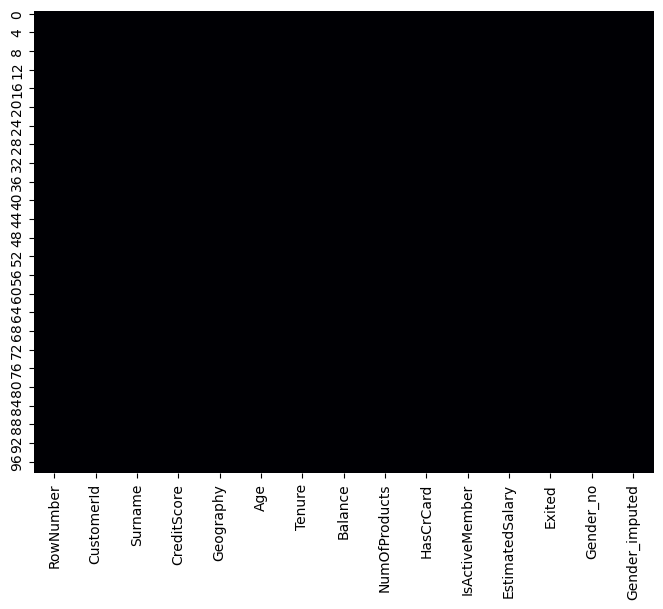

In [30]:
plt.figure(figsize = (8,6))
sb.heatmap(df.isnull(), cbar=False , cmap = 'magma')